# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

## Load Iris Dataset


In [33]:
import pandas as pd
from sklearn.datasets import load_iris

# 2. Load the Iris dataset
iris_data = load_iris()

# 3. Create a Pandas DataFrame from the loaded dataset's features
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# 4. Add the target variable as a new column
df['species_encoded'] = iris_data.target

# 5. Add the target names as another new column
df['species'] = iris_data.target_names[iris_data.target]

# 6. Display the first few rows of the DataFrame and its information
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

DataFrame Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species_encoded species  
0                0  setosa  
1                0  setosa  
2                0  setosa  
3                0  setosa  
4                0  setosa  

DataFrame Info:
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-n

In [34]:
from IPython.display import HTML, display

setosa_url = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Irissetosa1.jpg"
versicolor_url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg"
virginica_url = "https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"

html = f"""
<div style="display:flex; justify-content:center; gap:40px;">
  <div style="text-align:center;">
    <img src="{setosa_url}" style="width:320px; height:260px; object-fit:cover;"><br>
    <b>Iris setosa</b>
  </div>
  <div style="text-align:center;">
    <img src="{versicolor_url}" style="width:320px; height:260px; object-fit:cover;"><br>
    <b>Iris versicolor</b>
  </div>
  <div style="text-align:center;">
    <img src="{virginica_url}" style="width:320px; height:260px; object-fit:cover;"><br>
    <b>Iris virginica</b>
  </div>
</div>
"""

display(HTML(html))

## Exploratory Data Analysis (EDA)


In [35]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  species_encoded  
count        150.000000       150.000000  
mean           1.199333         1.000000  
std            0.762238         0.819232  
min            0.100000         0.000000  
25%            0.300000         0.000000  
50%            1.300000         1.000000  
75%            1.800000         2.000000  
max            2.500000         2.000000  


Generating pair plot...


<Figure size 1000x800 with 0 Axes>

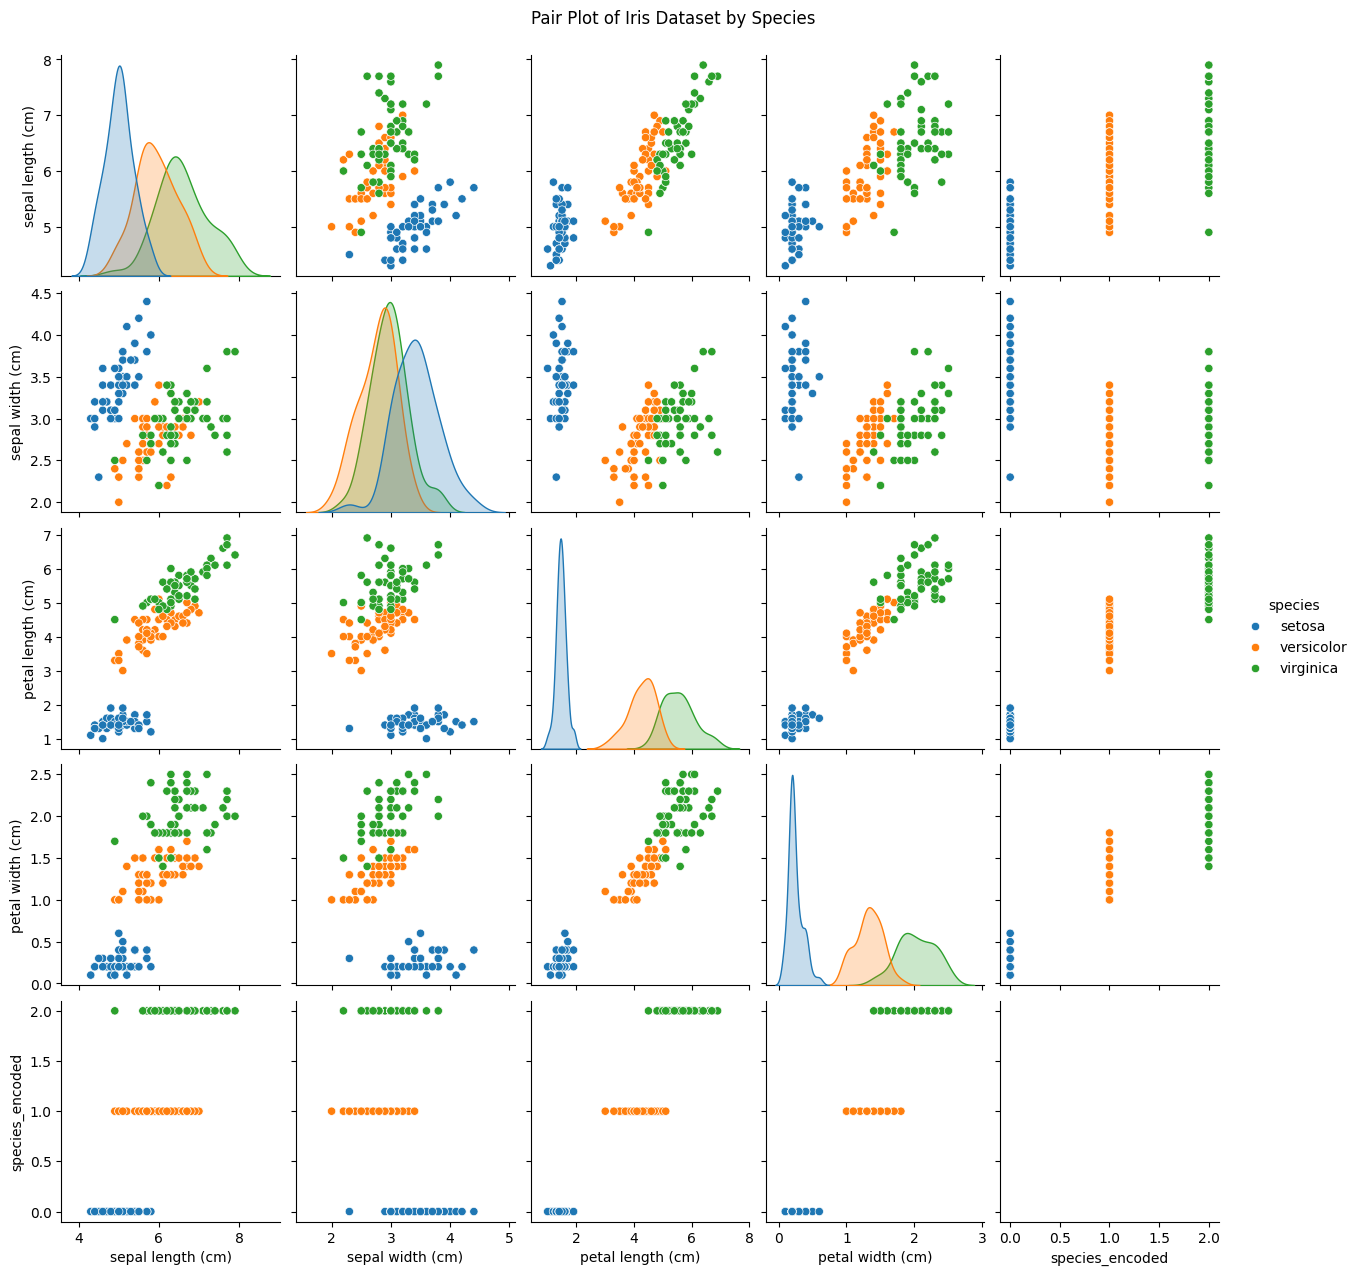

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generating pair plot...")
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Dataset by Species', y=1.02)
plt.show()


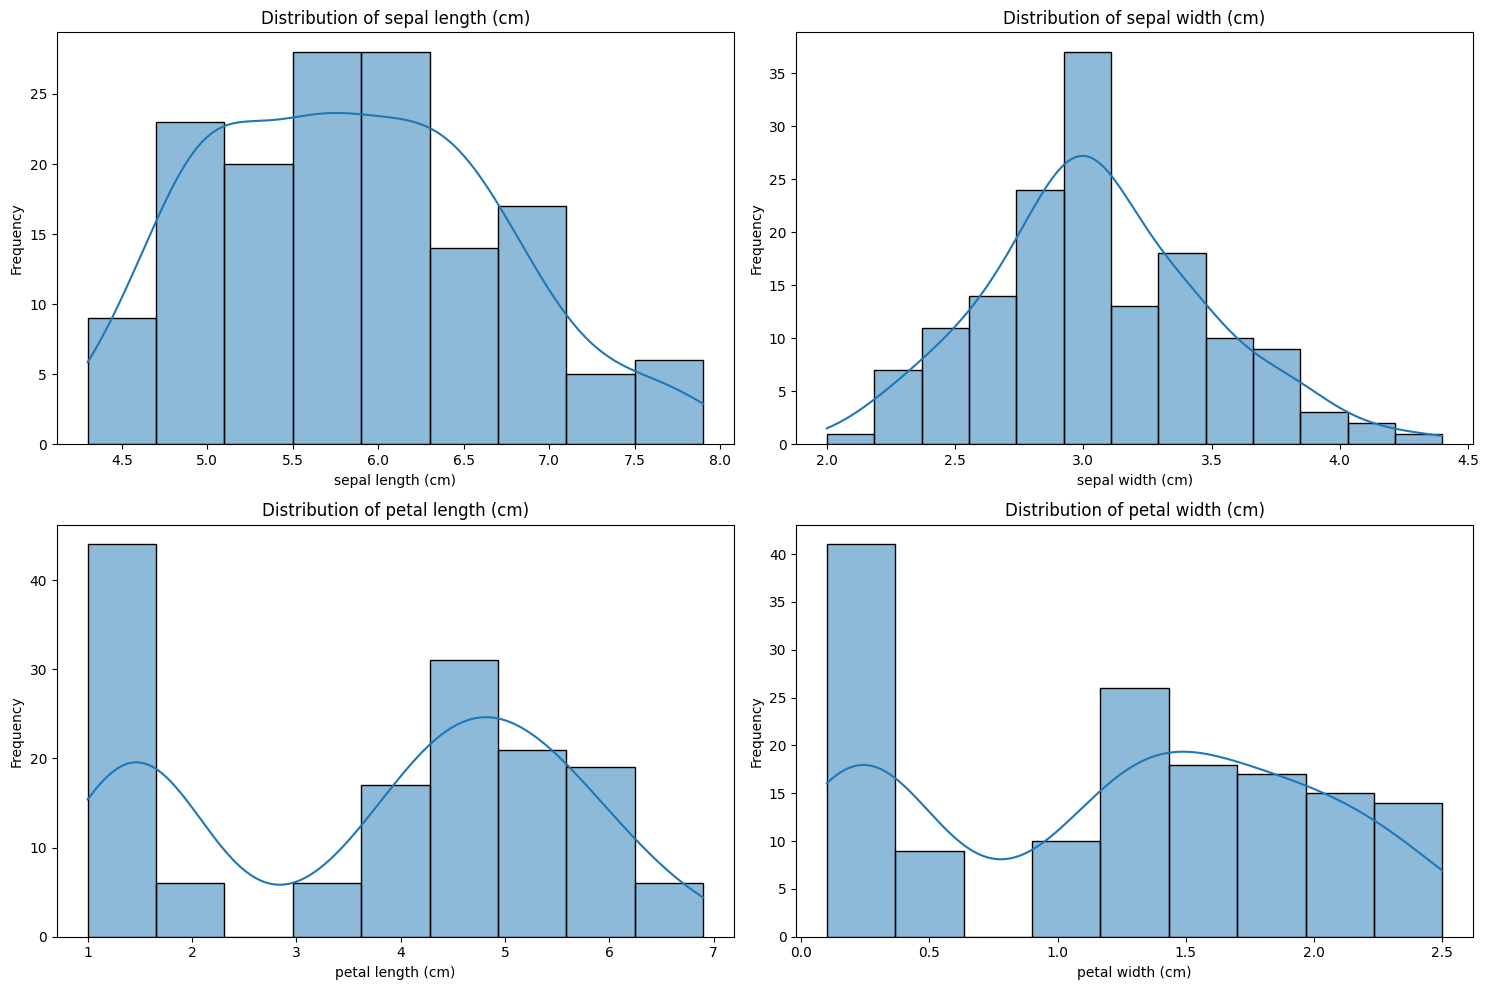

In [20]:
numerical_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1) # Arrange plots in a 2x2 grid
    sns.histplot(df[col], kde=True) # Use histplot for distribution
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


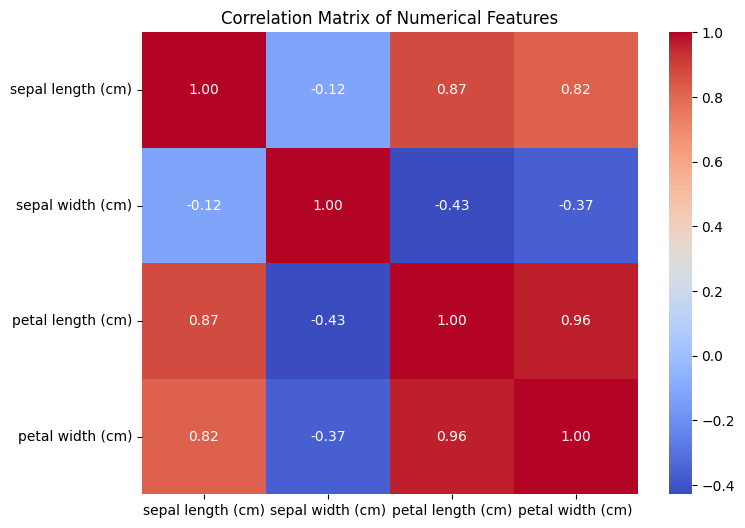

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

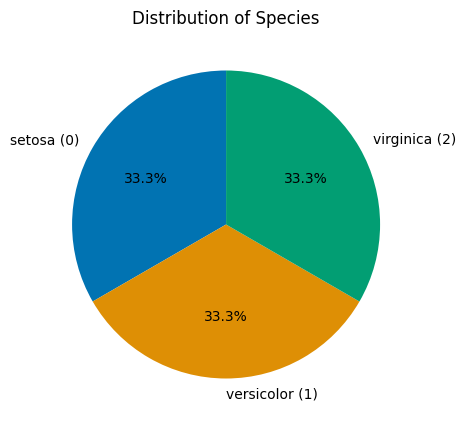

In [22]:
plt.figure(figsize=(5, 5))

# Get unique species and their encoded values to create custom labels
species_map = df[['species', 'species_encoded']].drop_duplicates().set_index('species').squeeze().to_dict()
labels = [f"{s} ({species_map[s]})" for s in df['species'].unique()]

colors = sns.color_palette('colorblind')

plt.pie(df['species'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Species')
plt.show()

## Data Preparation

Prepare the data for machine learning. This involves shuffling the dataset, splitting it into training and testing sets, and applying label encoding to the target variable if it's in string format, converting it to numerical labels.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y,
                                                    shuffle=True)

print("Data splitting complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nApplying StandardScaler to training data...")
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the X_train data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

print("Scaling of training data complete.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")

Data splitting complete.
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)

Applying StandardScaler to training data...
Scaling of training data complete.
X_train_scaled shape: (120, 4)


## Nested Cross-Validation with KNN and Naive Bayes

Nested cross-validation to evaluate and tune K-Nearest Neighbors (KNN) and Naive Bayes (NB) classifiers on the training data (X_train, y_train).


In [31]:
type(X_train_scaled), type(y_train)

(numpy.ndarray, pandas.Series)

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

print("Starting Nested Cross-Validation with scaled data...")

# 3. Define the parameter grid for K-Nearest Neighbors (KNN)
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]
}

# 4. Define the parameter grid for Gaussian Naive Bayes (NB)
nb_param_grid = {
    'var_smoothing': np.logspace(start=0, stop=-9, num=100, base=10)  #1,0.79...,0.63...,...,10−9
}                               #base**start,  base**stop

# 5. Initialize an outer_cv object using StratifiedKFold
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 6. Initialize empty lists to store the cross-validation scores for KNN and Naive Bayes
knn_outer_scores_scaled = []
nb_outer_scores_scaled = []

# 7. Loop through the outer folds of the scaled training data
for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    X_outer_train_scaled, X_outer_test_scaled = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_outer_train, y_outer_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # a. Inside the loop, define an inner_cv object
    inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # b. For KNN:
    # i. Create a GridSearchCV object
    knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=inner_cv, scoring='accuracy')
    # ii. Fit the GridSearchCV object on the outer training fold
    knn_grid_search.fit(X_outer_train_scaled, y_outer_train)
    # iii. Evaluate the best_estimator_ on the outer test fold
    knn_best_model = knn_grid_search.best_estimator_
    knn_pred = knn_best_model.predict(X_outer_test_scaled)
    knn_outer_scores_scaled.append(accuracy_score(y_outer_test, knn_pred))

    # c. For Naive Bayes:
    # i. Create a GridSearchCV object
    nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=inner_cv, scoring='accuracy')
    # ii. Fit the GridSearchCV object on the outer training fold
    nb_grid_search.fit(X_outer_train_scaled, y_outer_train)
    # iii. Evaluate the best_estimator_ on the outer test fold
    nb_best_model = nb_grid_search.best_estimator_
    nb_pred = nb_best_model.predict(X_outer_test_scaled)
    nb_outer_scores_scaled.append(accuracy_score(y_outer_test, nb_pred))

# 8. Print the mean and standard deviation of the cross-validation scores
print("\nNested Cross-Validation Results with Scaled Data:")
print(f"KNN - Mean Accuracy: {np.mean(knn_outer_scores_scaled):.4f} (+/- {np.std(knn_outer_scores_scaled):.4f})")
print(f"Naive Bayes - Mean Accuracy: {np.mean(nb_outer_scores_scaled):.4f} (+/- {np.std(nb_outer_scores_scaled):.4f})")

Starting Nested Cross-Validation with scaled data...

Nested Cross-Validation Results with Scaled Data:
KNN - Mean Accuracy: 0.9667 (+/- 0.0167)
Naive Bayes - Mean Accuracy: 0.9417 (+/- 0.0204)


## Train Models


In [26]:
# Re-run GridSearchCV for KNN on the entire X_train_scaled and y_train dataset
print("Training best KNN model with scaled data...")
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Re-initialize for clarity
knn_grid_search_final_scaled = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=inner_cv, scoring='accuracy')
knn_grid_search_final_scaled.fit(X_train_scaled, y_train)
best_knn_model_scaled = knn_grid_search_final_scaled.best_estimator_

Training best KNN model with scaled data...


In [27]:
# Re-run GridSearchCV for Naive Bayes on the entire X_train_scaled and y_train dataset
print("Training best Naive Bayes model with scaled data...")
nb_grid_search_final_scaled = GridSearchCV(GaussianNB(), nb_param_grid, cv=inner_cv, scoring='accuracy')
nb_grid_search_final_scaled.fit(X_train_scaled, y_train)
best_nb_model_scaled = nb_grid_search_final_scaled.best_estimator_

Training best Naive Bayes model with scaled data...


## Evaluate Models


In [28]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

# Scale the test set using the fitted scaler from training data
print("\nScaling X_test for final evaluation...")
X_test_scaled = scaler.transform(X_test)
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Make predictions on the X_test_scaled dataset using best_knn_model_scaled
knn_pred_test_scaled = best_knn_model_scaled.predict(X_test_scaled)

# Print a classification report for the KNN model
print("\nKNN Classification Report on Scaled Test Set:")
print(classification_report(y_test, knn_pred_test_scaled))


# Make predictions on the X_test_scaled dataset using best_nb_model_scaled
nb_pred_test_scaled = best_nb_model_scaled.predict(X_test_scaled)

# Print a classification report for the Naive Bayes model
print("\nNaive Bayes Classification Report on Scaled Test Set:")
print(classification_report(y_test, nb_pred_test_scaled))

# Print the accuracy score for both models on the test set
knn_accuracy_scaled = accuracy_score(y_test, knn_pred_test_scaled)
nb_accuracy_scaled = accuracy_score(y_test, nb_pred_test_scaled)

print(f"\nKNN Scaled Test Set Accuracy: {knn_accuracy_scaled:.4f}")
print(f"Naive Bayes Scaled Test Set Accuracy: {nb_accuracy_scaled:.4f}")


Scaling X_test for final evaluation...
X_test_scaled shape: (30, 4)

KNN Classification Report on Scaled Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Naive Bayes Classification Report on Scaled Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNN Scaled Test Set Accuracy: 0.9667
Naive Bayes Scaled Test Set A

Macro answers:

“How well do we perform per class on average?”

Weighted answers:

“How well do we perform overall considering class frequency?”


Confusion Matrix for KNN on Scaled Test Set:


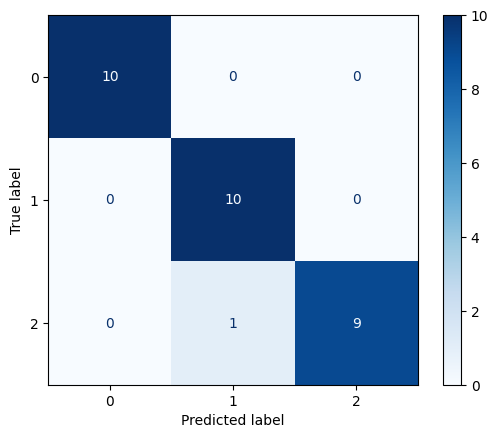

In [29]:
#plot confusion matrix of KNN
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

#display
print("\nConfusion Matrix for KNN on Scaled Test Set:")
knn_cm = ConfusionMatrixDisplay.from_predictions(y_test, knn_pred_test_scaled, display_labels=best_knn_model_scaled.classes_, cmap='Blues')

### Formulas for Classification Metrics

Let:
- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

- **Accuracy**:
  $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$
  
  $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- **Precision (Positive Predictive Value)**:
  $$\text{Precision} = \frac{TP}{TP + FP}$$

- **Recall (Sensitivity / True Positive Rate)**:
  $$\text{Recall} = \frac{TP}{TP + FN}$$

- **F1-Score**:
  $$\text{F1} = 2 \times \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

### Explanation of Classification Metrics:

*   **Accuracy**: This metric represents the proportion of correctly classified instances out of the total instances. For the Iris dataset, an accuracy of 0.97 for KNN means 97% of the Iris flowers in the test set were correctly identified across all three species. Higher accuracy is generally better, but it can be misleading in imbalanced datasets.

*   **Recall (Sensitivity or True Positive Rate)**: Recall measures the proportion of actual positive cases that were correctly identified by the model. In the context of Iris, for a specific species (e.g., 'setosa'), a recall of 1.00 means that all 'setosa' flowers present in the test set were correctly classified as 'setosa'. A high recall indicates that the model is good at finding all positive instances.

*   **Precision (Positive Predictive Value)**: Precision measures the proportion of positive identifications that were actually correct. For the 'setosa' species, a precision of 1.00 means that when the model predicted an Iris flower to be 'setosa', it was indeed 'setosa' 100% of the time. High precision indicates a low false positive rate.

*   **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both metrics. A high F1-score indicates that the model has good precision and recall, effectively balancing the trade-off between false positives and false negatives. It is particularly useful when you need to seek a balance between precision and recall, especially in cases where there might be uneven class distribution.